In [25]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

In [27]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});


<IPython.core.display.Javascript object>


# Complex waves and Integration of Wave Signals

Physical signals like acceleration often need to be integrated. The integration of acceleration with respect to $t$ gives velocity, and the integration of velocity gives displacement:

$$
u(t) = \int v(t) dt = \iint a(t) dt
$$

When integrating a harmonic signal like:

$$
a(t) = \alpha_0 \cdot cos(\omega_0 t + \theta)
$$

the signal shifted $-90^\circ$ or $\frac{\pi}{2}$ radians every integration:

$$
\begin{equation}
\int cos(t) dt = sin(t) = cos(t - \pi/2) \label{eq:int_cos}
\end{equation}
$$

or for a wave with a given angular frequency:

$$
\int cos(\omega t) dt = \frac{1}{\omega} sin (t)
$$

In [12]:
t = np.linspace(0, 2*np.pi, 7)
print(f'{np.sin(t)=}')
print(f'{np.cos(t - np.pi/2)=}')

print("Should be almost zero:", np.sum(np.abs(np.sin(t)-np.cos(t-np.pi/2))))

np.sin(t)=array([ 0.00000000e+00,  8.66025404e-01,  8.66025404e-01,  1.22464680e-16,
       -8.66025404e-01, -8.66025404e-01, -2.44929360e-16])
np.cos(t - np.pi/2)=array([ 6.12323400e-17,  8.66025404e-01,  8.66025404e-01,  6.12323400e-17,
       -8.66025404e-01, -8.66025404e-01, -1.83697020e-16])
Should be almost zero: 2.9471932233461867e-16


<IPython.core.display.Javascript object>


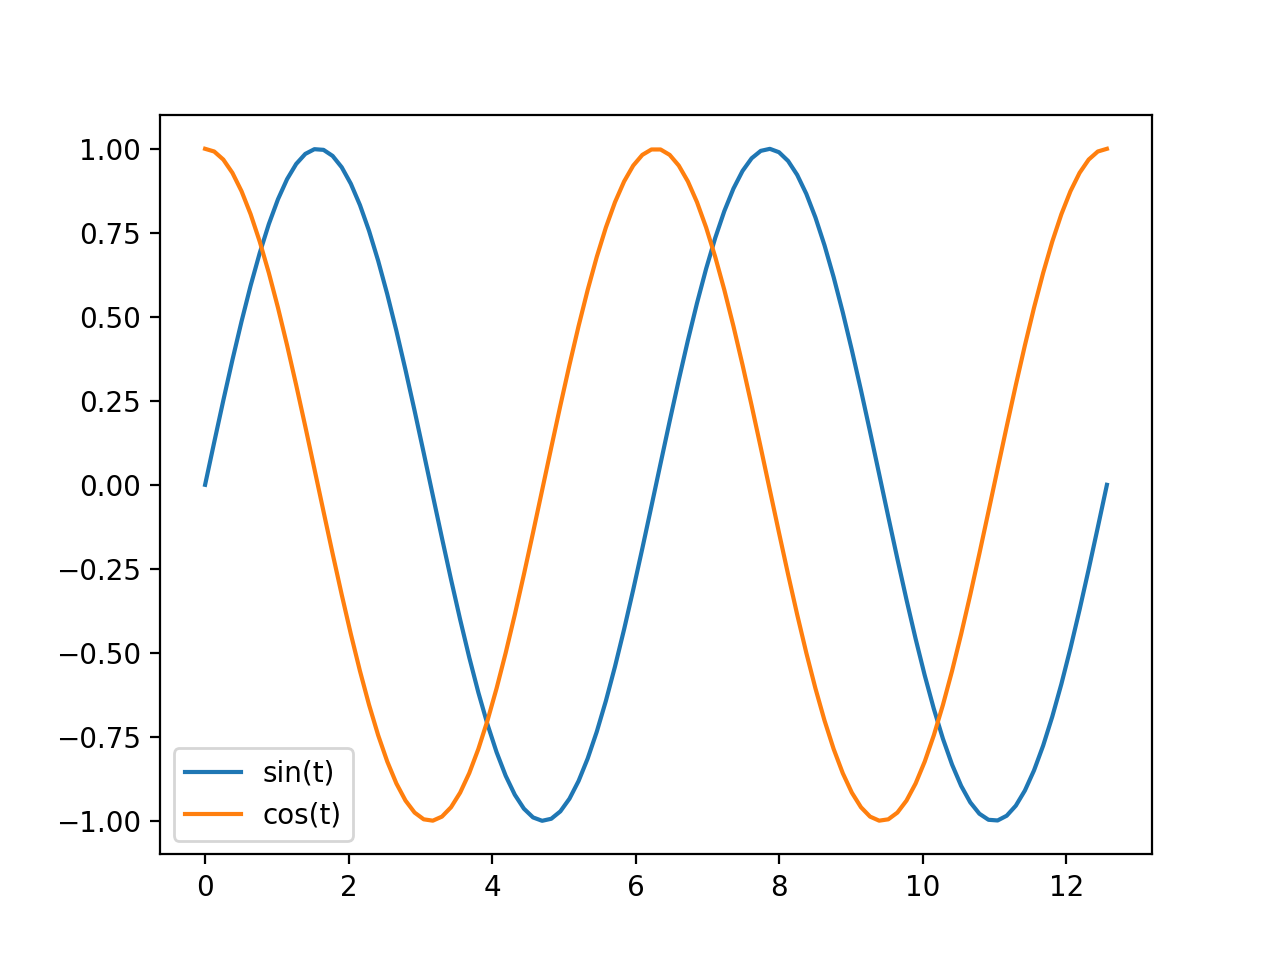

In [17]:
plt.figure()
t = np.linspace(0, 4*np.pi, 100)
plt.plot(t, np.sin(t), label='sin(t)')
plt.plot(t, np.cos(t), label='cos(t)')
plt.legend()

# Integration of complex frequencies

A wave can be described with a complex number for amplitude and phase shift for a given frequency:

$$
u_0(t) = A_0 \cdot e^{i \cdot (\omega_0t + \theta_0)} \\
u_0(t) = A_0 \cdot e^{i\theta_0} \cdot e^{i\omega_0 \cdot t}
$$

Where the complex number $A_0\cdot e^{\theta_0}$ is the (complex) coefficient describing the harmonic wave at frequency $\omega_0$.

<IPython.core.display.Javascript object>


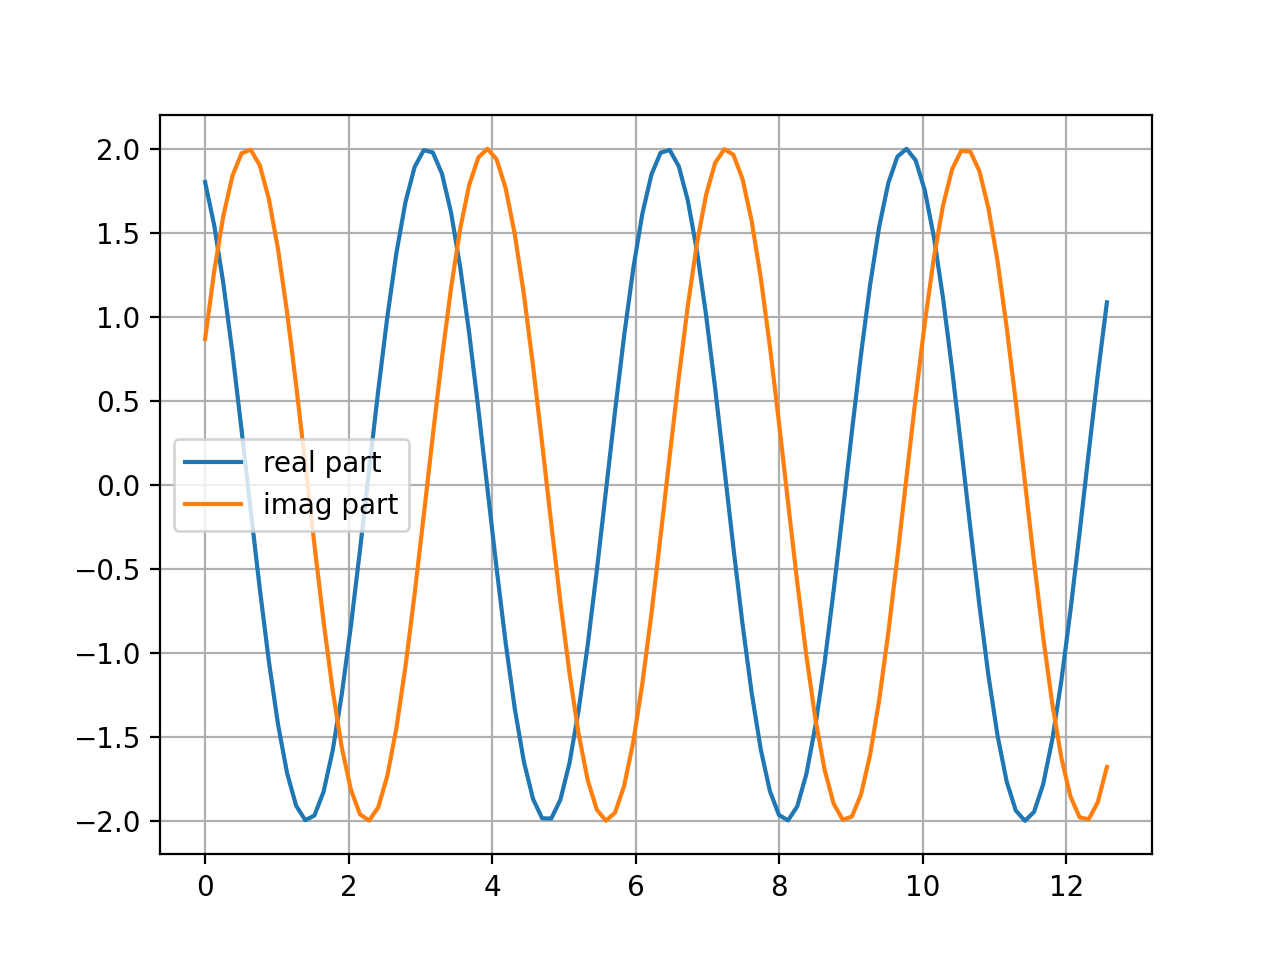

In [43]:
A0 = 2.
theta0 = np.pi/7
w_0 = 0.3 * 2 * np.pi # Frequency 0.3 Hz at omega_0
s = A0*np.exp(1j*theta0) * np.exp(1j*w_0*t)

# s now contains two waves with 90 degrees lag.
plt.figure()
plt.plot(t, np.real(s), label='real part')
plt.plot(t, np.imag(s), label='imag part')
plt.grid()
plt.legend()

The real part of the complex wave is the oscillations on the real axis of the unit circle, i.e. __the cosine part__. And the imaginary part of the complex wave corresponds to the oscillations along the __sine part__.

$$
e^{i\omega t} = cos(\omega t) + i \cdot sin(\omega t)
$$

## Integrating $e^{i \omega t}$

$$
\begin{align}
\int e^{i \omega t} dt &= \frac{1}{i \omega} e^{i \omega t} \\
                       &= \frac{-i}{\omega} e^{i \omega t} \\
                       &= \frac{-i}{\omega} \left [ cos (\omega t) + i \cdot sin (\omega t) \right ] \\
                       &= \frac{-i}{\omega} cos (\omega t) - \frac{i^2}{\omega} \cdot sin (\omega t) \\
                       &= \frac{1}{\omega} sin (\omega t) - \frac{i}{\omega} cos (\omega t) \\
                       &= \frac{1}{\omega} \left [ sin (\omega t) - i cos (\omega t) \right ]
\end{align}
$$

$$
\frac{1}{i} = \frac{i}{i^2} = \frac{i}{-1} = -i
$$

The real part of the complex wave is now the __sine__ function similar to in eq. **1**, a $90^\circ$ phase shift introduced by the integration.

### $1/i \omega$

> Integrating a complex wave is equivalent to dividing with $i \omega$.

<IPython.core.display.Javascript object>


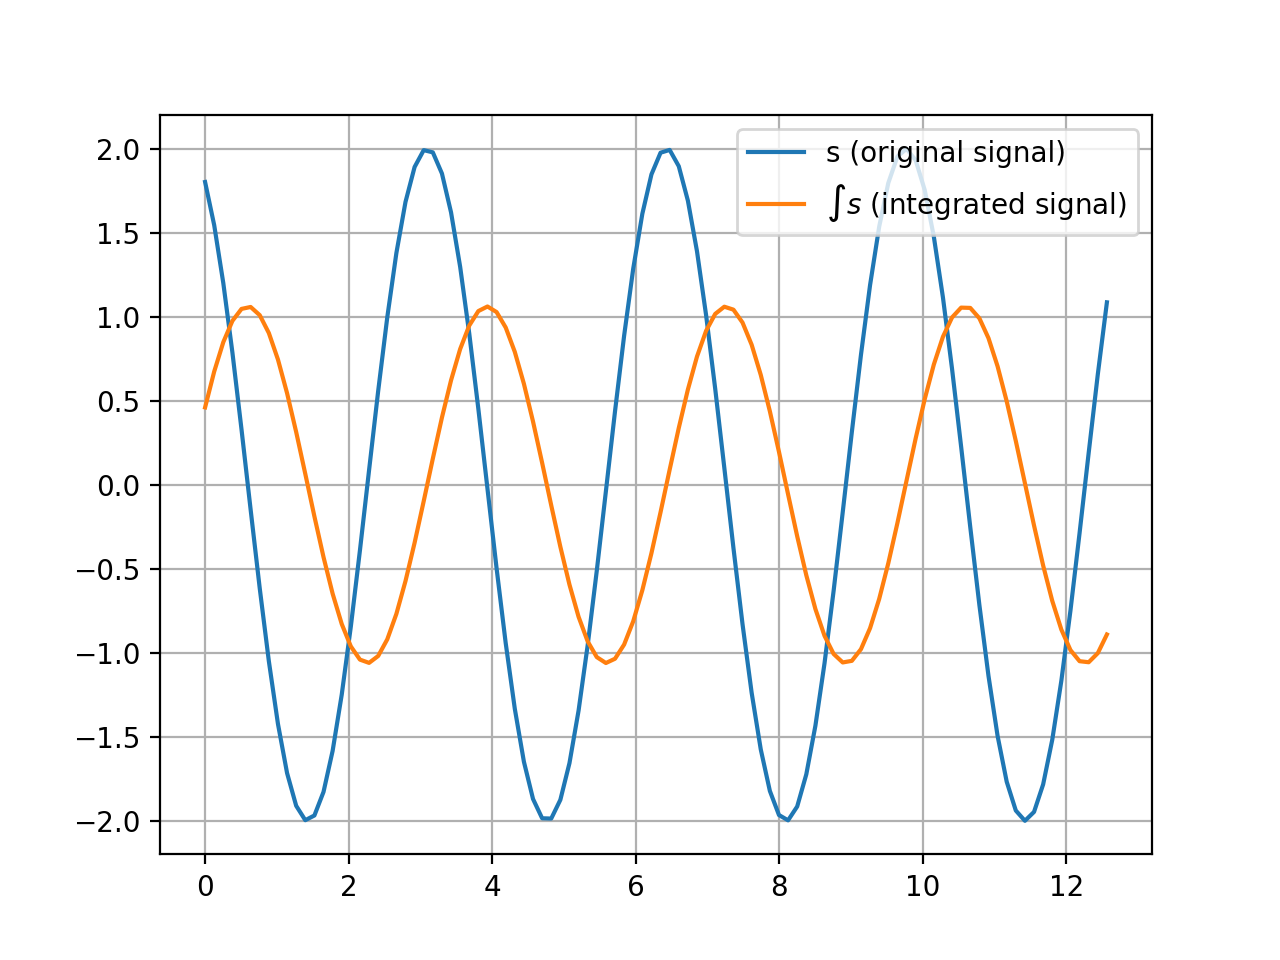

w_0=1.8849555921538759
A0=2.0
(A0/w_0)=1.0610329539459689


In [44]:
si = A0 * np.exp(1j*theta0) * np.exp(1j*t*w_0) / (1j*w_0)

plt.figure()
plt.plot(t, np.real(s), label='s (original signal)')
plt.plot(t, np.real(si), label='$\int s$ (integrated signal)')
plt.grid()
plt.legend()
print(f'{w_0=}')
print(f'{A0=}')
print(f'{(A0/w_0)=}')

The integrated signal is delayed with $90^\circ$ ($2\pi/4$), i.e.: the peak of `si` is reached one quarter of an osciliation after `s` and scaled by $\omega = 0.3 * 2 * \pi = 1.88$ to $A_0 / \omega_0 = 1.06$.

## Discrete Fourier Transform

Oppenheim (2014) shows that this integrator or differentiator corresponds to the __ideal band-limited differentiator__ for discretly sampled signals as well.
